# classification_mk2
Loading up our data:

In [1]:
import pandas as pd
import pickle

with open('df.pkl', 'rb') as f:
    df = pickle.load(f)

Let's create a decision tree and see if we can correctly classify the country's region.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error

train, test = train_test_split(df, test_size=0.2)
work = train.copy()

x = work[['Economy (GDP per Capita)', 'Freedom', 'Health (Life Expectancy)', 'Happiness Score']]
y = work[['Region Category']]

dt_1 = tree.DecisionTreeRegressor(random_state=101)
dt_1 = dt_1.fit(x, y)

y_pred = dt_1.predict(x)
print('TRAINING DATA')
print(f'r2 for dt_1: {r2_score(y, y_pred)}')
print(f'MSE for dt_1: {mean_squared_error(y, y_pred)}')

x_test = test[['Economy (GDP per Capita)', 'Freedom', 'Health (Life Expectancy)', 'Happiness Score']]
y_test = test[['Region Category']]
y_test_pred = dt_1.predict(x_test)
print('TEST DATA')
print(f'r2 for dt_1: {r2_score(y_test, y_test_pred)}')
print(f'MSE for dt_1: {mean_squared_error(y_test, y_test_pred)}')

TRAINING DATA
r2 for dt_1: 1.0
MSE for dt_1: 0.0
TEST DATA
r2 for dt_1: 0.7345584481878509
MSE for dt_1: 2.03125


In testing, I was getting very inconsistent results until I set the random state (30%=75%.) This isn't too promising yet. Here's how our tree looks as is:

[Text(0.656578947368421, 0.9642857142857143, 'x[0] <= 1.151\nsquared_error = 7.587\nsamples = 126\nvalue = 5.016'),
 Text(0.40789473684210525, 0.8928571428571429, 'x[2] <= 0.602\nsquared_error = 3.801\nsamples = 94\nvalue = 6.085'),
 Text(0.19736842105263158, 0.8214285714285714, 'x[1] <= 0.553\nsquared_error = 2.063\nsamples = 43\nvalue = 7.535'),
 Text(0.12105263157894737, 0.75, 'x[2] <= 0.385\nsquared_error = 1.575\nsamples = 39\nvalue = 7.744'),
 Text(0.06315789473684211, 0.6785714285714286, 'x[3] <= 3.581\nsquared_error = 0.038\nsamples = 25\nvalue = 8.04'),
 Text(0.042105263157894736, 0.6071428571428571, 'x[0] <= 0.303\nsquared_error = 0.188\nsamples = 4\nvalue = 8.25'),
 Text(0.021052631578947368, 0.5357142857142857, 'squared_error = 0.0\nsamples = 3\nvalue = 8.0'),
 Text(0.06315789473684211, 0.5357142857142857, 'squared_error = 0.0\nsamples = 1\nvalue = 9.0'),
 Text(0.08421052631578947, 0.6071428571428571, 'squared_error = 0.0\nsamples = 21\nvalue = 8.0'),
 Text(0.17894736842105

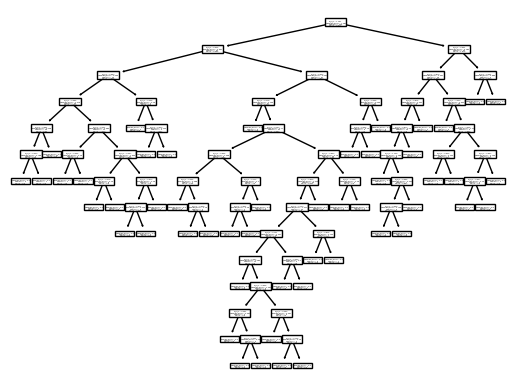

In [19]:
tree.plot_tree(dt_1)

Interesting. Let's try SVM:

In [28]:
from sklearn import svm

svm_1 = svm.SVC()
y_2 = y.values.ravel()
y_2_test = y_test.values.ravel()
svm_1.fit(x, y_2)

y_2_pred = svm_1.predict(x)
y_2_test_pred = svm_1.predict(x_test)

print('TRAINING DATA')
print(f'r2 for svm: {r2_score(y_2, y_2_pred)}')
print(f'MSE for svm: {mean_squared_error(y_2, y_2_pred)}')
print('TEST DATA')
print(f'r2 for svm: {r2_score(y_2_test, y_2_test_pred)}')
print(f'MSE for svm: {mean_squared_error(y_2_test, y_2_test_pred)}')

TRAINING DATA
r2 for svm: 0.47487795968518565
MSE for svm: 3.984126984126984
TEST DATA
r2 for svm: 0.4037774374680959
MSE for svm: 4.5625


Disappointing results.